A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
data = keras.datasets.mnist
#print(keras.datasets.mnist.load_data())
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [3]:
# data analysis
print(f"train images shape: {train_images.shape}")
print(f"train labes shape: {train_labels.shape}")

print(f"test images shape: {test_images.shape}")
print(f"test labes shape: {test_labels.shape}")

train images shape: (60000, 28, 28)
train labes shape: (60000,)
test images shape: (10000, 28, 28)
test labes shape: (10000,)


In [4]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

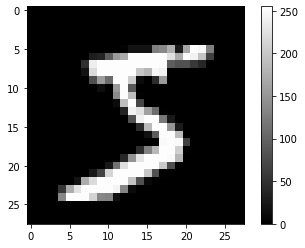

In [6]:
# Visualization. Pixeles go from 0 to 255
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.colorbar()
plt.grid(False)

plt.show()

In [7]:
# Standarization to keep all values between 0 to 1 (rather than 0 to 255)
train_images = train_images / 255.0
test_images = test_images / 255.0

1. Una CNN con:

1 capa convolutiva con 8 neuronas

1 MaxPool quedando las dimensiones de la imagen a la mitad

1 dropout 0.25

1 Flatten

1 dense con 32 neuronas

1 dense con 10 (salida)

In [4]:
# model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), filters=8),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling2D(14, 14),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

TypeError: ('Keyword argument not understood:', 'Dropout')

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
# training the model
model.fit(train_images, train_labels, epochs=10)

In [ ]:
# Accuracy 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2. Una CNN con:

1 capa convolutiva con 8 neuronas

1 MaxPool quedando las dimensiones de la imagen a la mitad

1 dropout 0.25

1 Flatten

1 dense con 16 neuronas

1 dense con 32 neuronas

1 dense con 10 (salida)